In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [9]:
#reading cleaned population data 
commoncities = pd.read_csv("CsvFiles/ChangingRates.csv")

#reading cleaned and sorted csvs
bottom= pd.read_csv("CsvFiles/FinalBottom20.csv")
top= pd.read_csv("CsvFiles/FinalTop20.csv")
pophighest = pd.read_csv('CsvFiles/highest_growth18-20.csv')
poplowest = pd.read_csv('CsvFiles/lowest_growth18-20.csv')

#reading cleaned population data 
cleaned_pop_df = pd.read_csv("CleanedData/cleaned_population.csv")

## Scatter Plot with Regressions for top and bottom cities in 2018-2020

<IPython.core.display.Javascript object>


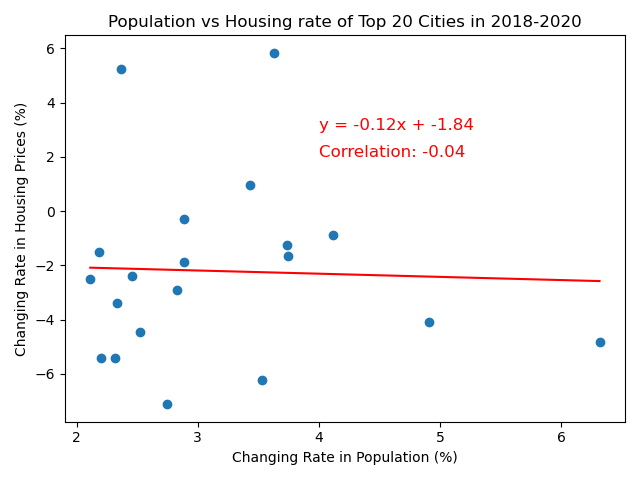

The r-value is: 0.0013709184923983227.
The correlation is -0.04


In [14]:
#plotting scatter plot/regression of top 20 Cities' pop rate vs housing rate in 2018-2020
%matplotlib notebook
fig, ax=plt.subplots()
x_values = pophighest['Diff in Pop Rate 2018-2020']
y_values = top['Diff in 2018-2020 changing rate']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of Top 20 Cities in 2018-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(4,3), fontsize=12,color="red")
plt.annotate(eq, (4,2), fontsize=12, color='red')
plt.tight_layout()
plt.savefig('Output/Q3topcorrelation2018-2020.png')
plt.show()

<IPython.core.display.Javascript object>


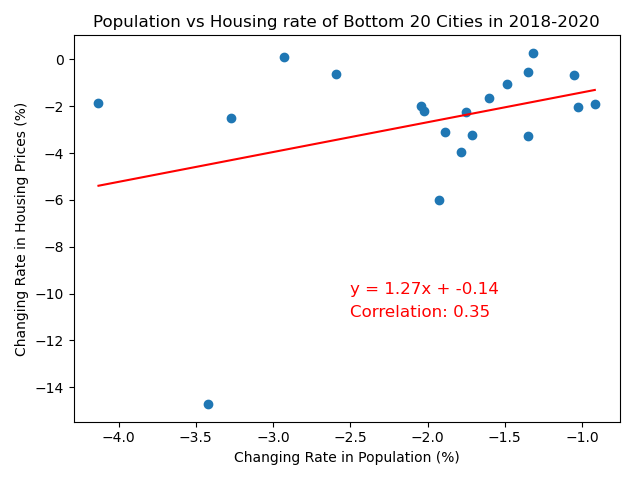

The r-value is: 0.11952332344638295.
The correlation is 0.35


In [15]:
#plotting scatter plot/regression of bottom 20 Cities' pop rate vs housing rate in 2018-2020
%matplotlib notebook
fig, ax=plt.subplots()
x_values = poplowest['Diff in Pop Rate 2018-2020']
y_values = bottom['Diff in 2018-2020 changing rate']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of Bottom 20 Cities in 2018-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(-2.5,-10), fontsize=12,color="red")
plt.annotate(eq, (-2.5,-11), fontsize=12, color='red')
plt.tight_layout()
plt.savefig('Output/Q3bottomcorrelation2018-2020.png')
plt.show()

## Extra : Similar comparison but using more housing and rental data in common cities to see if improved correlation

<IPython.core.display.Javascript object>


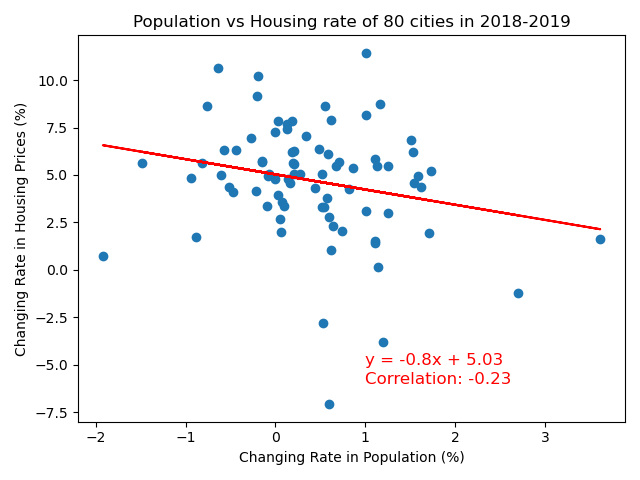

The r-value is: 0.051024182702200264.
The correlation is -0.23


In [29]:
#plotting scatter plot/regression of Population vs Housing rate of 80 cities in 2018-2019"
%matplotlib notebook
fig, ax=plt.subplots()

x_values = commoncities['PDR1819']
y_values = commoncities['HDR1819']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of 80 cities in 2018-2019")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(1,-5),fontsize=12,color="red")
plt.annotate(eq, (1,-6), fontsize=12, color='red')
plt.tight_layout()
plt.savefig('Output/Q3_80citiesPopvHousing2018-19.png')
plt.show()

<IPython.core.display.Javascript object>


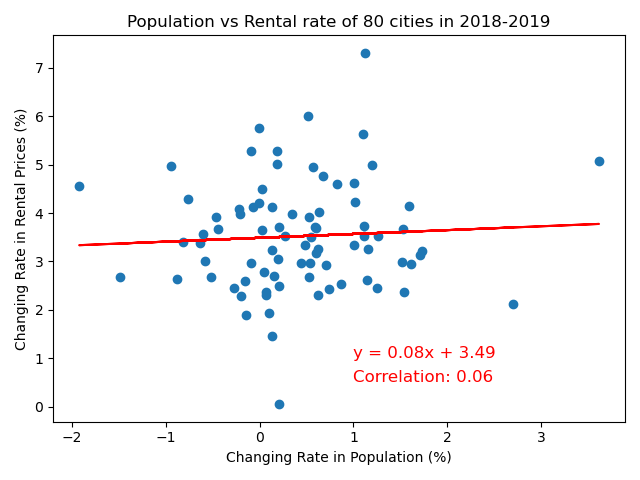

The r-value is: 0.0035941897858938763.
The correlation is 0.06


In [17]:
#plotting scatter plot/regression of Population vs Rental rate of 80 cities in 2018-2019"
%matplotlib notebook
fig, ax=plt.subplots()
x_values = commoncities['PDR1819']
y_values = commoncities['RDR1819']
plt.scatter(x_values,y_values)
plt.title("Population vs Rental rate of 80 cities in 2018-2019")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Rental Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(1,1),fontsize=12,color="red")
plt.annotate(eq, (1,0.5), fontsize=12, color='red')
plt.savefig('Output/Q3_80citiesPopvRental2018-19.png')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


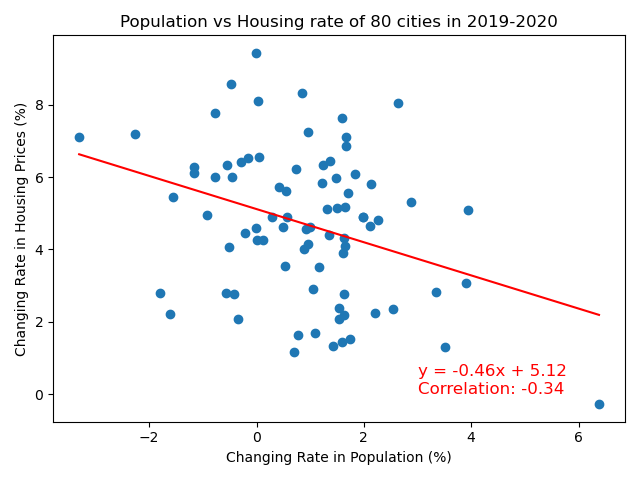

The r-value is: 0.11242669657254296.
The correlation is -0.34


In [27]:
#plotting scatter plot/regression of Population vs Housing rate of 80 cities in 2019-2020"
%matplotlib notebook
fig, ax=plt.subplots()

x_values = commoncities['PDR1920']
y_values = commoncities['HDR1920']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of 80 cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(3,0.5),fontsize=12,color="red")
plt.annotate(eq, (3,0), fontsize=12, color='red')
plt.savefig('Output/Q3_80citiesPopvHousing2019-20.png')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


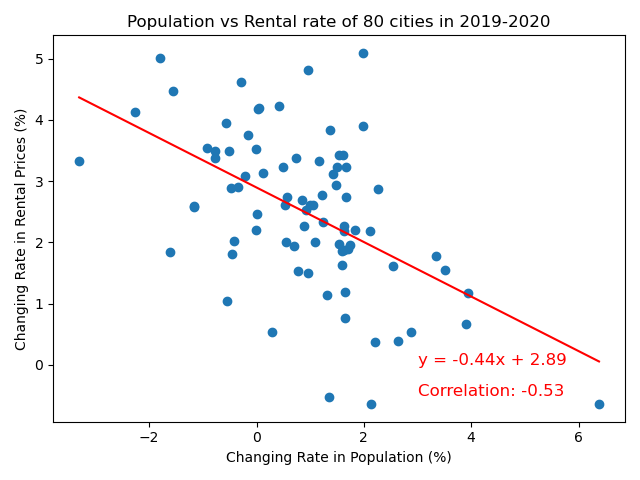

The r-value is: 0.27856453107898516.
The correlation is -0.53


In [16]:
#plotting scatter plot/regression of Population vs Rental rate of 80 cities in 2019-2020"
%matplotlib notebook
fig, ax=plt.subplots()
x_values = commoncities['PDR1920']
y_values = commoncities['RDR1920']
plt.scatter(x_values,y_values)
plt.title("Population vs Rental rate of 80 cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Rental Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(3,0),fontsize=12,color="red")
plt.annotate(eq, (3,-0.5), fontsize=12, color='red')
plt.savefig('Output/Q3_80citiesPopvRental2019-20.png')
plt.tight_layout()
plt.show()

## Reanalyze by dropping outliers to look for improved correlation

In [17]:
for city in commoncities:
    
    # Determine outliers using upper and lower bounds
    quartiles = commoncities['PDR1920'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = commoncities.loc[(commoncities['PDR1920'] < lower_bound) | (commoncities['PDR1920'] > upper_bound)]

    print(f"potential outliers: {outliers}")

potential outliers:     Unnamed: 0             city   PDR1819   PDR1920   HDR1819   HDR1920  \
0            0  Salt Lake City   0.065857  6.381907  2.014300 -0.280364   
80          80        Columbus   0.824024 -3.306448  4.248568  7.101124   

     RDR1819   RDR1920  
0   2.314455 -0.639372  
80  4.607823  3.326074  
potential outliers:     Unnamed: 0             city   PDR1819   PDR1920   HDR1819   HDR1920  \
0            0  Salt Lake City   0.065857  6.381907  2.014300 -0.280364   
80          80        Columbus   0.824024 -3.306448  4.248568  7.101124   

     RDR1819   RDR1920  
0   2.314455 -0.639372  
80  4.607823  3.326074  
potential outliers:     Unnamed: 0             city   PDR1819   PDR1920   HDR1819   HDR1920  \
0            0  Salt Lake City   0.065857  6.381907  2.014300 -0.280364   
80          80        Columbus   0.824024 -3.306448  4.248568  7.101124   

     RDR1819   RDR1920  
0   2.314455 -0.639372  
80  4.607823  3.326074  
potential outliers:     Unnamed: 0   

<IPython.core.display.Javascript object>


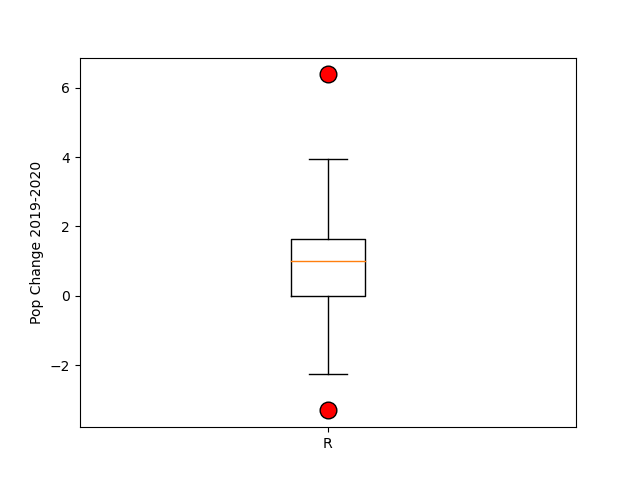

In [18]:
#plotting boxplot with outliers

fig1, ax1 = plt.subplots()
flierprops = dict(marker='o',markerfacecolor='r',markersize=12)
plt.boxplot(commoncities['PDR1920'],flierprops=flierprops)
ax1.set_xticklabels(city)
ax1.set_ylabel('Pop Change 2019-2020')
plt.show()

In [24]:
#drop outliers
dropped = commoncities.drop([0, 80])
dropped.head()
dropped.count()

Unnamed: 0    79
city          79
PDR1819       79
PDR1920       79
HDR1819       79
HDR1920       79
RDR1819       79
RDR1920       79
dtype: int64

<IPython.core.display.Javascript object>


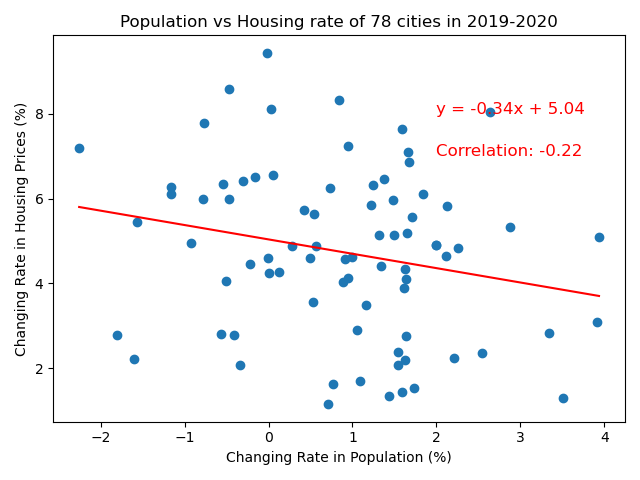

The r-value is: 0.04941193516867261.
The correlation is -0.22


In [22]:
#plotting scatter plot/regression of Population vs Rental rate of 78 cities (dropped outliers) in 2019-2020"
%matplotlib notebook
fig,ax=plt.subplots()
x_values = dropped['PDR1920']
y_values = dropped['HDR1920']
plt.scatter(x_values,y_values)
plt.title("Population vs Housing rate of 78 cities in 2019-2020")
plt.xlabel("Changing Rate in Population (%)")
plt.ylabel("Changing Rate in Housing Prices (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cor = st.pearsonr(x_values, y_values)
print(f'The r-value is: {rvalue**2}.')
print(f"The correlation is {round(cor[0],2)}")
eq = (f"Correlation: {round(cor[0],2)}")
plt.plot(x_values,regress_values, color='red')
plt.annotate(line_eq,(2,8),fontsize=12,color="red")
plt.annotate(eq, (2,7), fontsize=12, color='red')
plt.savefig('Output/Q3_78citiesPopvHousing2019-20.png')
plt.tight_layout()
plt.show()
#does not show stronger correlation with dropped outliers "